In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# path=/content/drive/MyDrive/Colab Notebooks/cab_analysis/

In [3]:
cab_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cab_analysis/Cab_Data.csv')
city_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cab_analysis/City.csv')
transaction_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cab_analysis/Transaction_ID.csv')
customer_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cab_analysis/Customer_ID.csv')

In [4]:
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
  transaction_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [7]:
customer_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [8]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [9]:
cab_df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_df['Date of Travel'], unit='D')

print(cab_df['Date of Travel'])

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


In [10]:
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [11]:
 df_cust_tran = pd.merge(customer_df, transaction_df,how='outer', on='Customer ID')

In [12]:
df_cust_tran

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,1,Male,36,16359,10008434,Cash
1,1,Male,36,16359,10012732,Card
2,1,Male,36,16359,10053182,Card
3,1,Male,36,16359,10055394,Cash
4,1,Male,36,16359,10074090,Cash
...,...,...,...,...,...,...
440093,60000,Female,27,20303,10393188,Cash
440094,60000,Female,27,20303,10425458,Card
440095,60000,Female,27,20303,10425480,Card
440096,60000,Female,27,20303,10434169,Cash


In [13]:
 df_cab_transaction = pd.merge(cab_df, df_cust_tran, on='Transaction ID',how='outer')

In [14]:
df_cab_transaction

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
440094,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
440095,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card
440096,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Male,20,11284,Card


In [15]:
df_data = df_cab_transaction.copy()

In [16]:
df_data.isna().sum()

,0
Transaction ID,0
Date of Travel,80706
Company,80706
City,80706
KM Travelled,80706
Price Charged,80706
Cost of Trip,80706
Customer ID,0
Gender,0
Age,0


In [17]:
customer_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


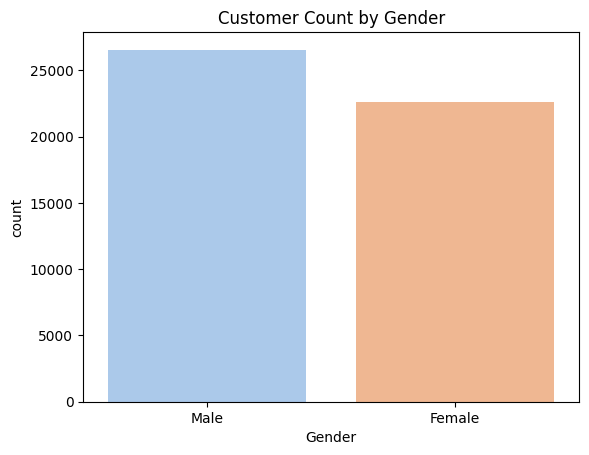

In [18]:
sns.countplot(data=customer_df, x='Gender', palette='pastel')
plt.xlabel('Gender')
plt.title('Customer Count by Gender')
plt.show()

<Axes: title={'center': 'Customer Age Distribution'}, ylabel='Frequency'>

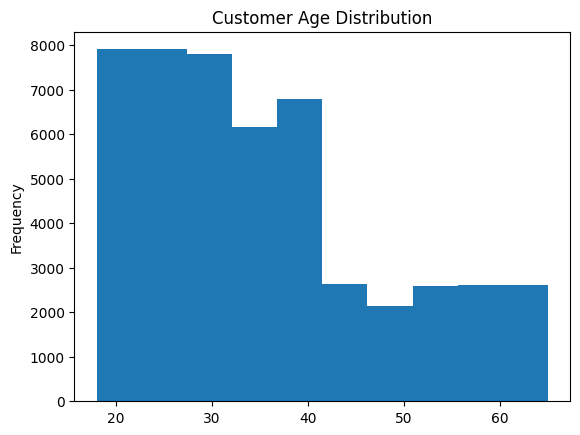

In [19]:
# Age distribution
customer_df['Age'].plot(kind='hist', bins=10, title='Customer Age Distribution')

# OUt_come of the graph -Cutomer between 20- 40 book more cabs


<Axes: title={'center': 'Customer Income Distribution'}, ylabel='Frequency'>

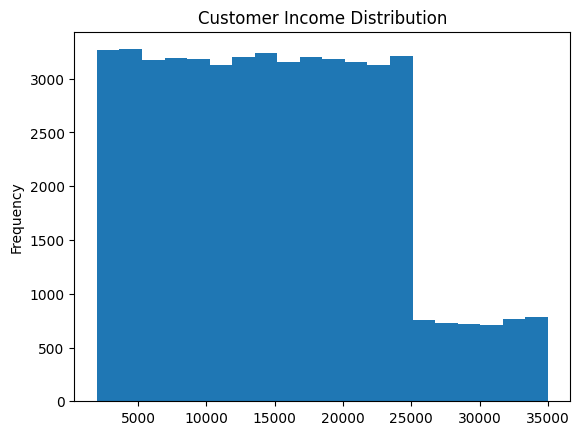

In [20]:

customer_df['Income (USD/Month)'].plot(kind='hist', bins=20, title='Customer Income Distribution')

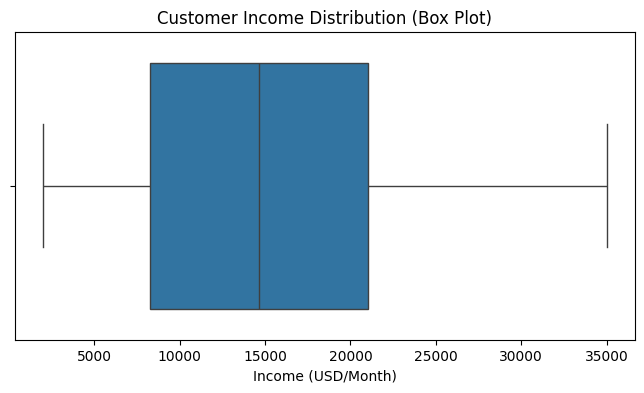

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=customer_df['Income (USD/Month)'])
plt.title('Customer Income Distribution (Box Plot)')
plt.xlabel('Income (USD/Month)')
plt.show()


In [22]:
mask = df_data['Date of Travel'].isnull()


In [23]:
customers_without_travel = df_data[mask]

In [24]:
Finding_customer_without_recent_transcation=df_data['Date of Travel'].isnull()

In [25]:
# customers_without_travel.head()
customers_without_travel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80706 entries, 192 to 440097
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      80706 non-null  int64         
 1   Date of Travel      0 non-null      datetime64[ns]
 2   Company             0 non-null      object        
 3   City                0 non-null      object        
 4   KM Travelled        0 non-null      float64       
 5   Price Charged       0 non-null      float64       
 6   Cost of Trip        0 non-null      float64       
 7   Customer ID         80706 non-null  int64         
 8   Gender              80706 non-null  object        
 9   Age                 80706 non-null  int64         
 10  Income (USD/Month)  80706 non-null  int64         
 11  Payment_Mode        80706 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 8.0+ MB


Customers details in cutomer table But there is no recent or we can no rides between 2016 to 2019

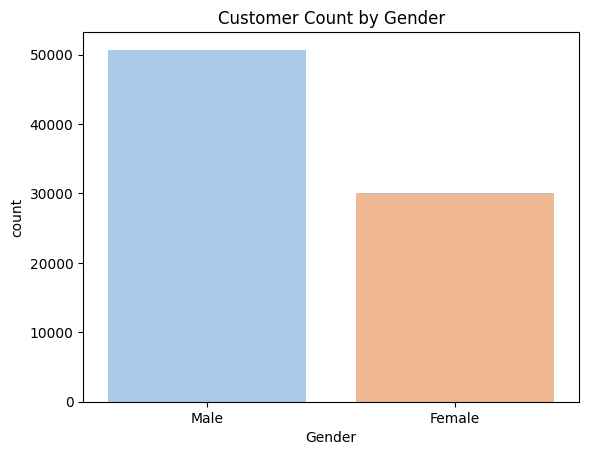

In [26]:
sns.countplot(data=customers_without_travel, x='Gender', palette='pastel')
plt.xlabel('Gender')
plt.title('Customer Count by Gender')
plt.show()

In [27]:
data_df=df_data.dropna()

In [28]:
data_df.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0
Customer ID,0
Gender,0
Age,0


In [29]:
data_df['profit_per_unit'] = data_df['Price Charged']-data_df['Cost of Trip']

In [30]:
data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,profit_per_unit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card,57.3150
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card,23.6660
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash,27.5680
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash,25.7980
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card,16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440090,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash,5.8800
440093,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash,6.9020
440094,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash,87.4200
440095,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card,32.1420


In [31]:
data_df['Day']=data_df['Date of Travel'].dt.day_name()

In [32]:
#Repeat Customer Analysis
repeat_counts = data_df.groupby('Customer ID')['Transaction ID'].count()
# repeat_counts.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

In [33]:
repeat_counts

,Transaction ID
Customer ID,
1,29
2,40
3,46
4,26
5,31
...,...
59996,4
59997,10
59998,9


In [34]:
data_df['Day']=data_df['Date of Travel'].dt.day_name()

<Axes: xlabel='Company', ylabel='count'>

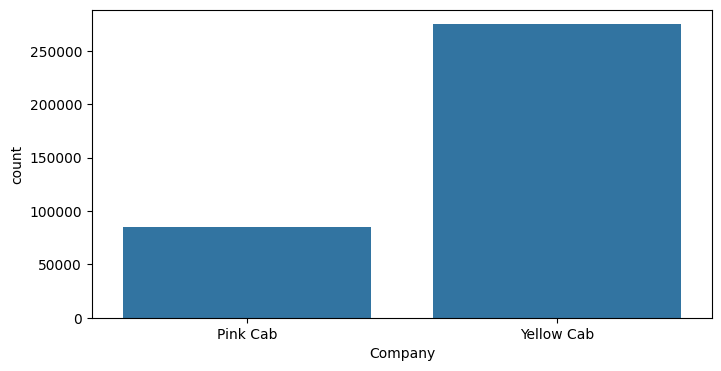

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(data=data_df,x=data_df['Company'])

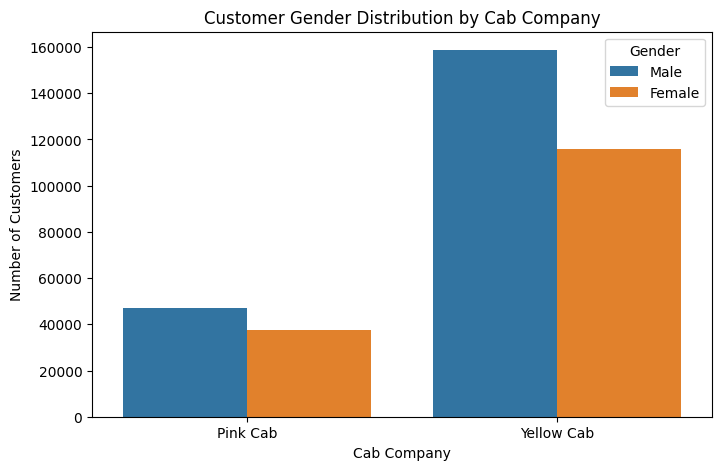

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_df, x='Company', hue='Gender')
plt.title('Customer Gender Distribution by Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.show()

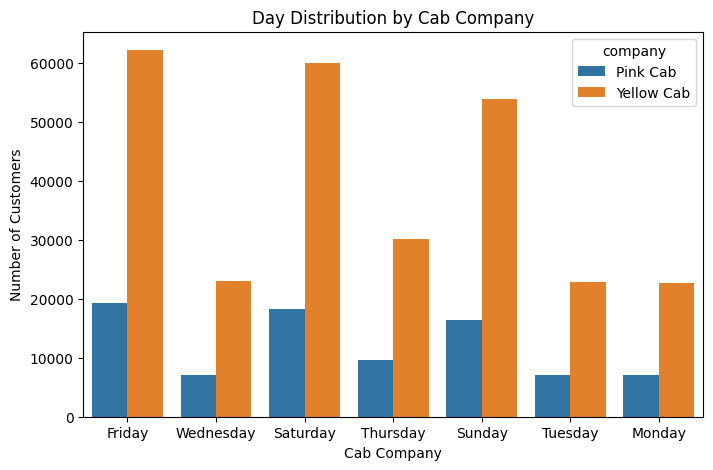

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_df, x='Day', hue='Company')
plt.title('Day Distribution by Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.legend(title='company')
plt.show()

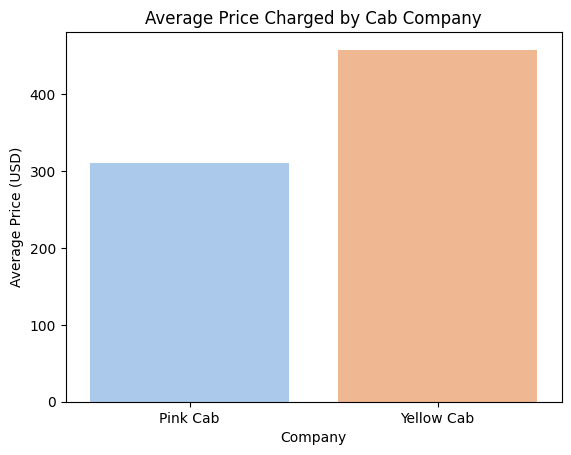

In [38]:
avg_price = data_df.groupby('Company')['Price Charged'].mean().reset_index()

sns.barplot(data=avg_price, x='Company', y='Price Charged', palette='pastel')
plt.title('Average Price Charged by Cab Company')
plt.ylabel('Average Price (USD)')
plt.show()

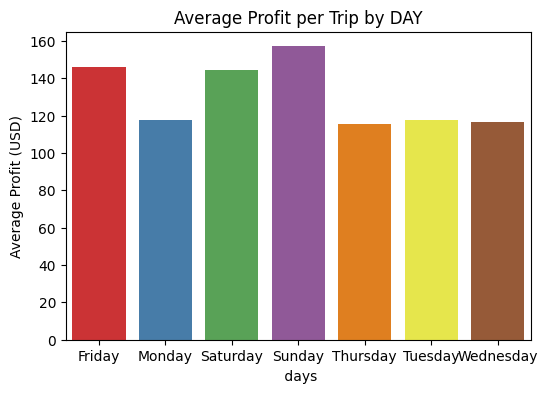

In [39]:
avg_profit = data_df.groupby('Day')['profit_per_unit'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_profit, x='Day', y='profit_per_unit', palette='Set1')
plt.title('Average Profit per Trip by DAY')
plt.ylabel('Average Profit (USD)')
plt.xlabel(' days')
plt.show()

In [40]:
data_df['Travel_Month'] = data_df['Date of Travel'].dt.month_name()


In [41]:
data_df['Travel_Year'] = data_df['Date of Travel'].dt.year


In [42]:
data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,profit_per_unit,Day,Travel_Month,Travel_Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card,57.3150,Friday,January,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card,23.6660,Wednesday,January,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash,27.5680,Saturday,January,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash,25.7980,Thursday,January,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card,16.8440,Sunday,January,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440090,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash,5.8800,Monday,January,2018
440093,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash,6.9020,Thursday,January,2018
440094,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash,87.4200,Friday,January,2018
440095,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card,32.1420,Friday,January,2018


In [43]:
from pandas.api.types import CategoricalDtype

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_type = CategoricalDtype(categories=month_order, ordered=True)

In [44]:
data_df['Travel_Month'] = data_df['Travel_Month'].astype(month_type)


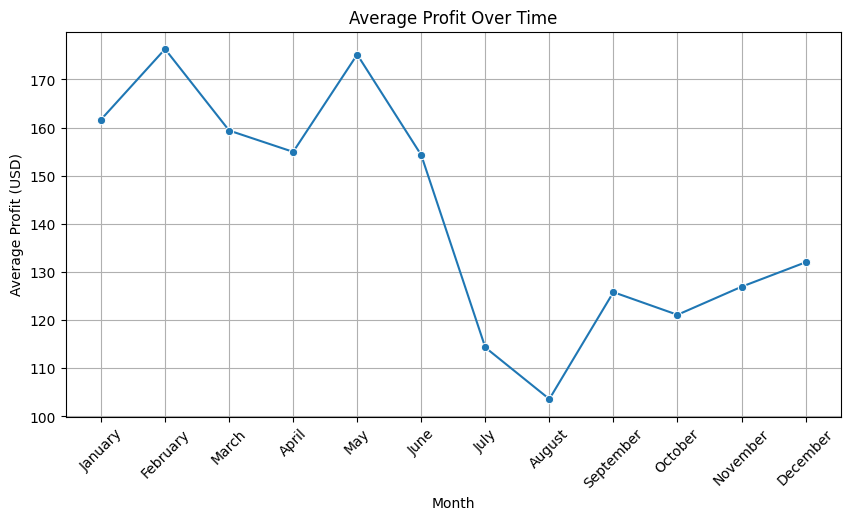

In [45]:
profit_over_time = data_df.groupby('Travel_Month')['profit_per_unit'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=profit_over_time, x='Travel_Month', y='profit_per_unit', marker='o')
plt.title('Average Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Average Profit (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


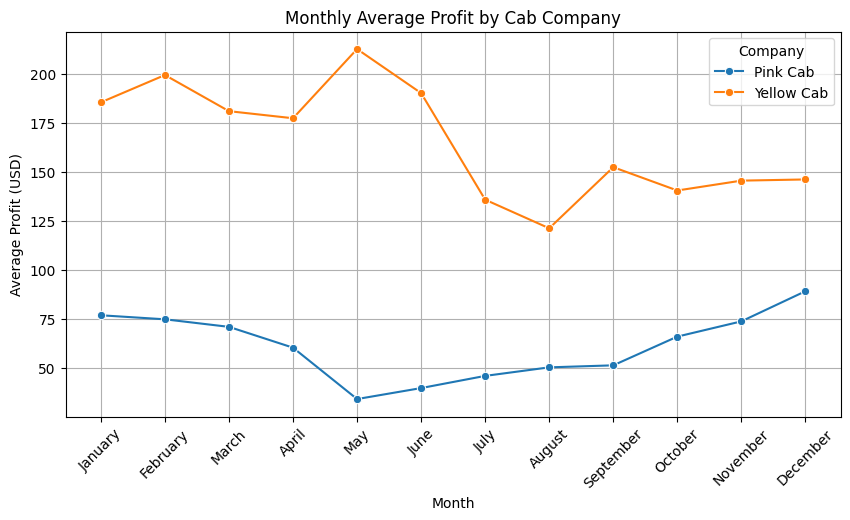

In [46]:
profit_by_company_time = data_df.groupby(['Travel_Month', 'Company'])['profit_per_unit'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=profit_by_company_time, x='Travel_Month', y='profit_per_unit', hue='Company', marker='o')
plt.title('Monthly Average Profit by Cab Company')
plt.xlabel('Month')
plt.ylabel('Average Profit (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [47]:
trip_counts = data_df['Company'].value_counts().reset_index()
trip_counts.columns = ['Company', 'Trip_Count']

In [48]:
trip_trend = data_df.groupby(['Travel_Month', 'Company']).size().reset_index(name='Trip_Count')


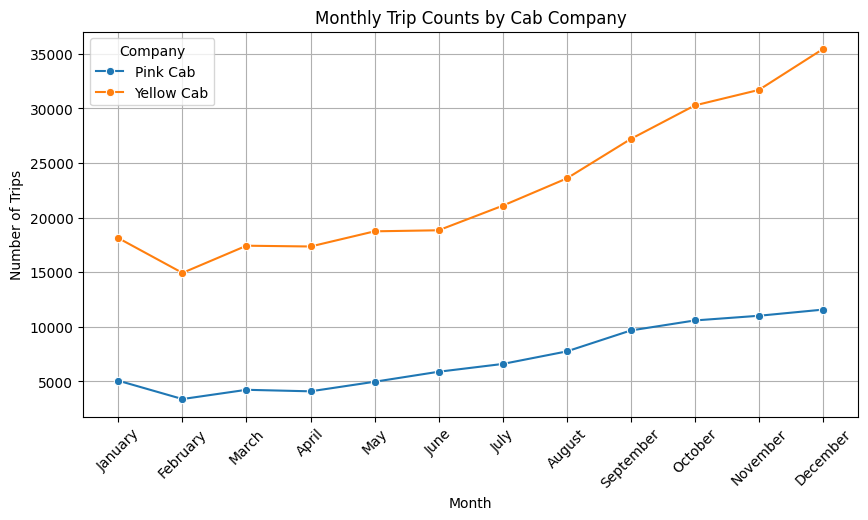

In [49]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=trip_trend, x='Travel_Month', y='Trip_Count', hue='Company', marker='o')
plt.title('Monthly Trip Counts by Cab Company')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [50]:
# print(data_df['Travel_Year'].dtype)
data_df['Travel_Year'] = data_df['Travel_Year'].astype(str)
print(data_df['Travel_Year'].dtype)

object


In [64]:
profit_over_time = data_df.groupby(['Travel_Year','Company'])['profit_per_unit'].mean().reset_index()
print(profit_over_time)



  Travel_Year     Company  profit_per_unit
0        2016    Pink Cab        68.321819
1        2016  Yellow Cab       169.347821
2        2017    Pink Cab        67.070839
3        2017  Yellow Cab       168.817057
4        2018    Pink Cab        53.229689
5        2018  Yellow Cab       143.416122


In [52]:
data_df.dtypes

,0
Transaction ID,int64
Date of Travel,datetime64[ns]
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64
Customer ID,int64
Gender,object
Age,int64


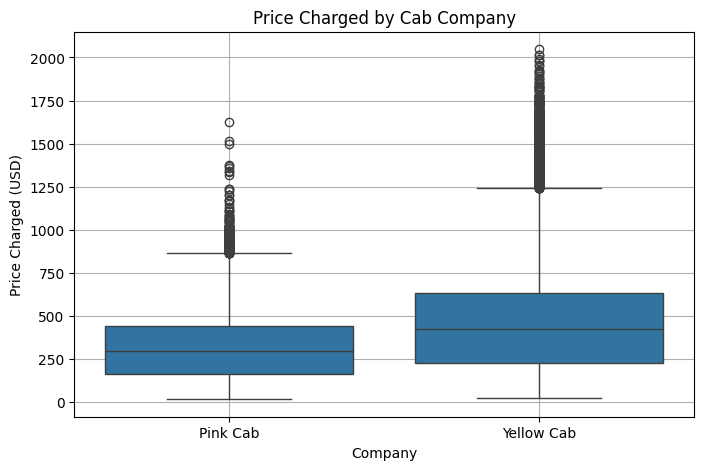

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_df, x='Company', y='Price Charged')
plt.title('Price Charged by Cab Company')
plt.ylabel('Price Charged (USD)')
plt.grid(True)
plt.show()

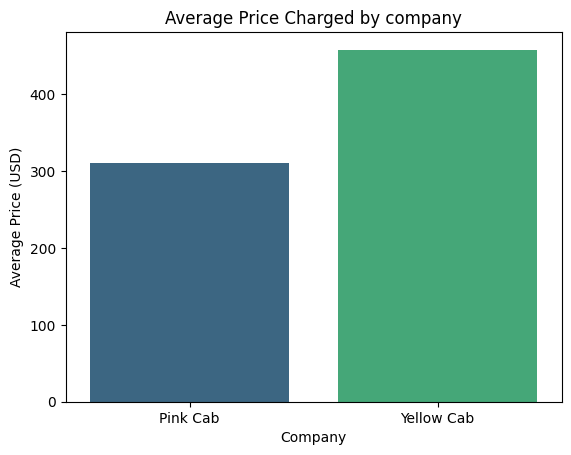

In [54]:
# Calculate the average price charged by gender
avg_price_by_company = data_df.groupby('Company')['Price Charged'].mean().reset_index()

# Plot the average price charged by gender
sns.barplot(data=avg_price_by_company, x='Company', y='Price Charged', palette='viridis')
plt.title('Average Price Charged by company')
plt.xlabel('Company')
plt.ylabel('Average Price (USD)')
plt.show()

Hypotheses:
H₀ (Null): There is no difference in average price charged (μ₁ = μ₂)

H₁ (Alt): There is a difference in average price charged (μ₁ ≠ μ₂)

In [55]:
from scipy.stats import ttest_ind

# Filter data
pink_prices = data_df[data_df['Company'] == 'Pink Cab']['Price Charged']
yellow_prices = data_df[data_df['Company'] == 'Yellow Cab']['Price Charged']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(pink_prices, yellow_prices, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -176.942
P-value: 0.0000


Since p-value < 0.05, you reject the null hypothesis.

This means:

There is a statistically significant difference in the average price charged by Pink Cab and Yellow Cab.

In [56]:
print("Pink Cab Avg Price:", pink_prices.mean())
print("Yellow Cab Avg Price:", yellow_prices.mean())

Pink Cab Avg Price: 310.8008562052154
Yellow Cab Avg Price: 458.18198998110523


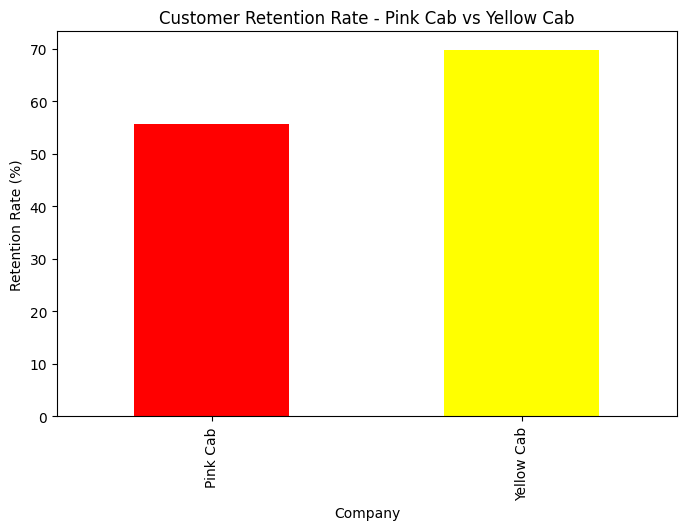

In [57]:
rides_per_customer = data_df.groupby(['Customer ID', 'Company']).size().reset_index(name='Ride_Count')

# determine the number of customers who have taken more than one ride (Repeat Customers)
repeat_customers = rides_per_customer[rides_per_customer['Ride_Count'] > 1]

# calculate Retention Rate for each company
total_customers = rides_per_customer.groupby('Company')['Customer ID'].nunique()
repeat_customer_count = repeat_customers.groupby('Company')['Customer ID'].nunique()

retention_rate = (repeat_customer_count / total_customers) * 100

# visualize the Retention Rate plot
retention_rate.plot(kind='bar', color=['red', 'yellow'], figsize=(8, 5))
plt.title('Customer Retention Rate - Pink Cab vs Yellow Cab')
plt.xlabel('Company')
plt.ylabel('Retention Rate (%)')
plt.show()

H₀ (Null Hypothesis): The retention rate is the same for Pink Cab and Yellow Cab.

H₁ (Alternative Hypothesis): The retention rates are different between the two companies.

In [58]:
non_repeat_customer_count = total_customers - repeat_customer_count


In [59]:
from scipy.stats import chi2_contingency

# Build contingency table
contingency_table = pd.DataFrame({
    'Repeated': repeat_customer_count,
    'Not Repeated': total_customers - repeat_customer_count
})

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", round(chi2, 3))
print("P-value:", round(p, 4))

Chi-squared statistic: 1548.733
P-value: 0.0


In [68]:
# Since the p-value < 0.05, we reject the null hypothesis.
#  There is a statistically significant difference in customer retention rates between Pink Cab and Yellow Cab.


In [61]:
print(retention_rate)


Company
Pink Cab      55.663470
Yellow Cab    69.844095
Name: Customer ID, dtype: float64


Build retention strategies:

For the lower-retention company: offer loyalty programs, discounts, or better service targeting high-value customers.

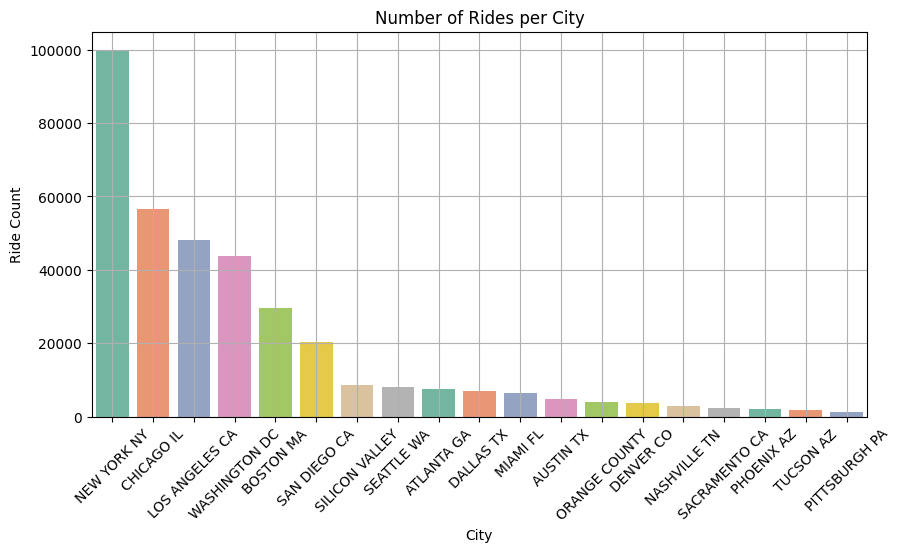

In [62]:
ride_counts = data_df['City'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=ride_counts.index, y=ride_counts.values, palette="Set2")
plt.title("Number of Rides per City")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

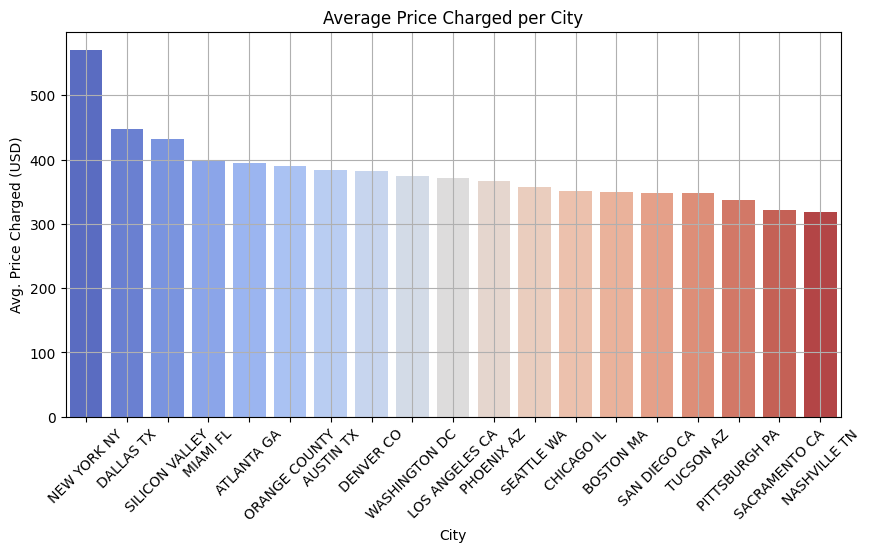

In [65]:
avg_price_city = data_df.groupby('City')['Price Charged'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette="coolwarm")
plt.title("Average Price Charged per City")
plt.ylabel("Avg. Price Charged (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
data_df

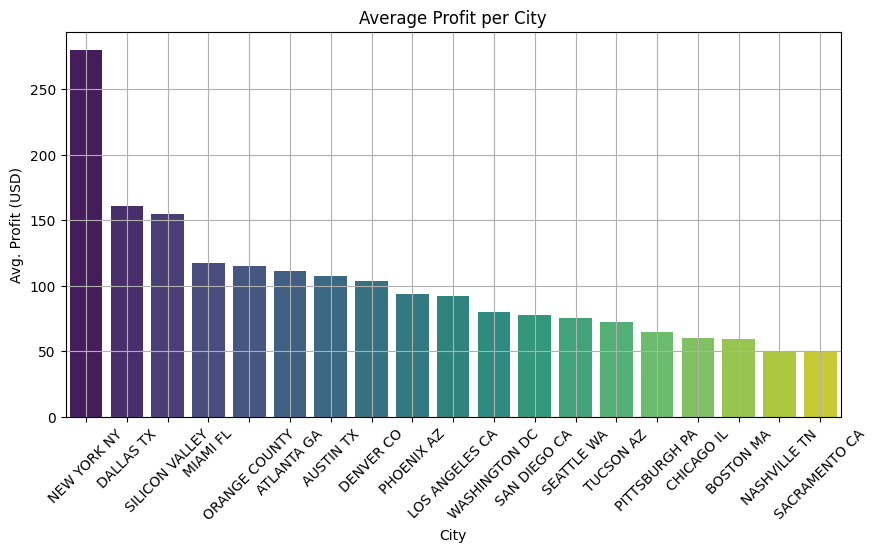

In [66]:
# data_df['Profit'] = data_df['Price Charged'] - data_df['Cost of Trip']

avg_profit_city = data_df.groupby('City')['profit_per_unit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_profit_city.index, y=avg_profit_city.values, palette="viridis")
plt.title("Average Profit per City")
plt.ylabel("Avg. Profit (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

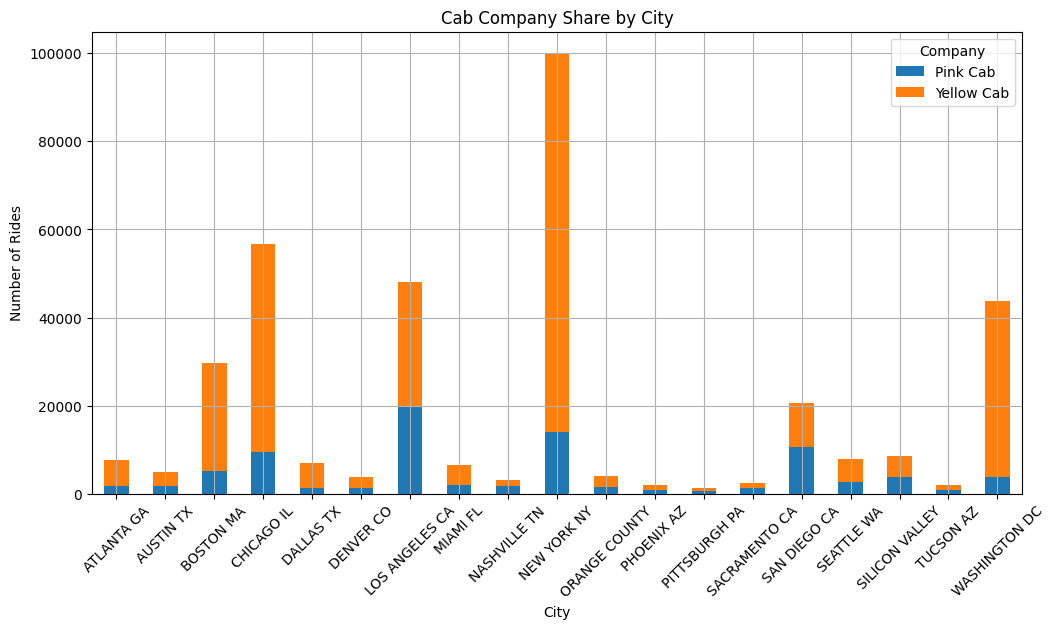

In [67]:
company_city = data_df.groupby(['City', 'Company']).size().unstack()

company_city.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Cab Company Share by City")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()